In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [43]:
v = pd.read_csv("../../data/processed/V.csv")
fgr = pd.read_csv("../../data/processed/FGR.csv", decimal=",")

In [12]:
v.drop(columns=["Unnamed: 0"], inplace=True)

# Gerando variavel demanda diaria por linha

In [29]:
demanda_p_linha_dia = v.groupby(["linha_numero", "movimento_diario_data_mov"]).count()["passageiro_matricula"].to_frame().reset_index()
demanda_p_linha_dia.rename(columns={"passageiro_matricula": "demanda_do_dia"}, inplace = True)

In [30]:
demanda_p_linha_dia

,linha_numero,movimento_diario_data_mov,demanda_do_dia
0,1,2021-08-29,232
1,1,2021-08-31,9096
2,1,2021-09-01,8888
3,1,2021-09-02,8244
4,1,2021-09-03,9020
...,...,...,...
2078,942,2021-09-05,2
2079,991,2021-08-31,76
2080,991,2021-09-01,55
2081,991,2021-09-02,55


# Validação Hipótese
##### O tamanho do trajeto se correlaciona positivamente com a demanda.

In [81]:
fgr

,Unnamed: 0,fechamento_data,empresa_numero,empresa_nome,linha_numero,linha_nome,linha_km_programado,linha_km_adotado,linha_eficiencia,passageiro_grupo,passageiro_demanda,passageiro_arrecadacao,passageiro_arrecadacao_prevista
0,0,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Vale Transporte BUM,14,47.2,49.2
1,1,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Gratuidade,27,0.0,0.0
2,2,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Vale Transporte,1636,5654.4,5654.4
3,3,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Gratuidade p/ deficiente,140,0.0,0.0
4,4,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Meia,193,298.0,298.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17525,2036,2021-09-07,67,COOTRAPS - Coop. dos Transp. Aut. de Pas,757,Vila Velha/Centro,855.00,700.56,81.94,Gratuidade,44,0.0,0.0
17526,2037,2021-09-07,67,COOTRAPS - Coop. dos Transp. Aut. de Pas,757,Vila Velha/Centro,855.00,700.56,81.94,Vale Transporte,767,2657.4,2657.4
17527,2038,2021-09-07,67,COOTRAPS - Coop. dos Transp. Aut. de Pas,757,Vila Velha/Centro,855.00,700.56,81.94,Gratuidade p/ deficiente,21,0.0,0.0
17528,2039,2021-09-07,67,COOTRAPS - Coop. dos Transp. Aut. de Pas,757,Vila Velha/Centro,855.00,700.56,81.94,Vale Transporte BUM,8,26.8,28.8


In [82]:
linha_p_km_programado = fgr[["fechamento_data", "linha_numero", "linha_km_programado"]].drop_duplicates()

In [83]:
linha_p_km_programado = linha_p_km_programado[linha_p_km_programado.linha_km_programado != 0]

In [93]:
linha_demanda_km = demanda_p_linha_dia.merge(linha_p_km_programado, how="inner", left_on=["linha_numero", "movimento_diario_data_mov"], right_on=["linha_numero","fechamento_data"])
linha_demanda_km.drop(columns=["fechamento_data"], inplace=True)
linha_demanda_km = linha_demanda_km.groupby(["linha_numero", "movimento_diario_data_mov"]).mean()

<AxesSubplot:>

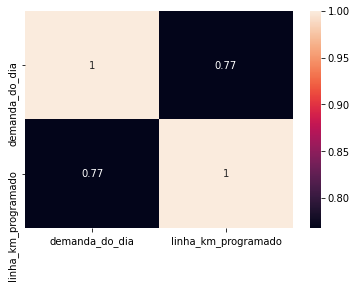

In [101]:
sb.heatmap(linha_demanda_km.corr(), annot=True)

Conclusão: o tamanho do trajeto se correlaciona positivamente com a demanda.

##### O tipo de passagem mais utilizada na linha influencia na demanda da mesma.

In [106]:
fgr.groupby(["linha_numero", "fechamento_data"]).max()["passageiro_grupo"].to_frame().reset_index().passageiro_grupo.value_counts()

Vale Transporte BUM    1670
Vale Transporte         304
Gratuidade                8
Name: passageiro_grupo, dtype: int64

In [108]:
linhas_max_tip_passageiro = fgr.groupby(["linha_numero", "fechamento_data"]).max()["passageiro_grupo"].to_frame().reset_index()

In [115]:
fgr[(fgr.linha_numero == 1) & (fgr.fechamento_data == "2021-09-07")]

,Unnamed: 0,fechamento_data,empresa_numero,empresa_nome,linha_numero,linha_nome,linha_km_programado,linha_km_adotado,linha_eficiencia,passageiro_grupo,passageiro_demanda,passageiro_arrecadacao,passageiro_arrecadacao_prevista
16383,894,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Inteira,1174,4226.4,4226.4
16384,895,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Meia,115,181.6,181.6
16385,896,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Gratuidade,1,0.0,0.0
16386,897,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Vale Transporte,79,270.0,270.0
16387,898,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Integracao,8,0.0,0.0
16388,899,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Vale Transporte BUM,1,3.6,3.6
17221,1732,2021-09-07,36,Santa Cecília Transportes Ltda.,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Gratuidade,606,2116.8,2116.8
17222,1733,2021-09-07,36,Santa Cecília Transportes Ltda.,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Vale Transporte,2228,7722.6,7722.6
17223,1734,2021-09-07,36,Santa Cecília Transportes Ltda.,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Meia,163,247.6,247.6
17224,1735,2021-09-07,36,Santa Cecília Transportes Ltda.,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Vale Transporte BUM,249,460.2,864.2


In [119]:
linha_demanda_tip_passageiro = demanda_p_linha_dia.merge(linhas_max_tip_passageiro, how="inner", left_on=["linha_numero", "movimento_diario_data_mov"], right_on=["linha_numero","fechamento_data"])
linha_demanda_tip_passageiro.drop(columns=["fechamento_data"], inplace = True)
linha_demanda_tip_passageiro.rename(columns={"passageiro_grupo": "tip_pass_mais_freq"}, inplace = True)

In [120]:
linha_demanda_tip_passageiro

,linha_numero,movimento_diario_data_mov,demanda_do_dia,tip_pass_mais_freq
0,1,2021-09-01,8888,Vale Transporte BUM
1,1,2021-09-02,8244,Vale Transporte BUM
2,1,2021-09-03,9020,Vale Transporte BUM
3,1,2021-09-04,6572,Vale Transporte BUM
4,1,2021-09-05,4167,Vale Transporte BUM
...,...,...,...,...
1725,920,2021-09-05,2350,Vale Transporte BUM
1726,920,2021-09-06,2345,Vale Transporte BUM
1727,991,2021-09-01,55,Vale Transporte BUM
1728,991,2021-09-02,55,Vale Transporte BUM


In [124]:
linha_demanda_tip_passageiro.describe()

,linha_numero,demanda_do_dia
count,1730.000000,1730.000000
mean,382.506936,1736.750867
std,262.673196,1982.421598
min,1.000000,1.000000
25%,108.000000,502.000000
50%,357.000000,1070.000000
75%,631.000000,2095.250000
max,999.000000,15203.000000


(2095 - 502)*1.5 + 2095 = Limite Superior = 4485

In [126]:
linha_demanda_tip_passageiro.query("demanda_do_dia <= 4485", inplace=True)

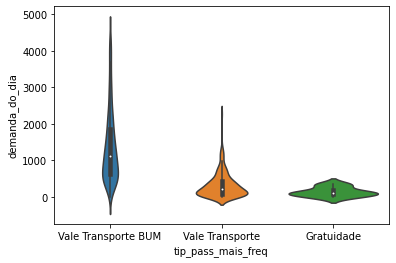

In [127]:
sb.violinplot(data=linha_demanda_tip_passageiro, x="tip_pass_mais_freq", y="demanda_do_dia");

Devido ao desbalanceamento, não podemos considerar o tipo de passageiro mais frequente como algo que se correlaciona com a demanda.